In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

In [14]:
# Load dataset
df = pd.read_csv("employement.csv")

In [15]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38647,38,Self-emp-not-inc,403391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
26566,39,Private,196673,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,5013,0,40,United-States,<=50K
23229,60,?,124487,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,>50K
5977,18,Private,302712,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
31407,25,Private,241025,Bachelors,13,Never-married,Other-service,Own-child,White,Male,0,0,18,United-States,<=50K
28544,34,Private,849857,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Nicaragua,<=50K
10191,31,Private,103596,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,<=50K
41092,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
674,28,Private,226089,10th,6,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
48433,22,Private,186849,11th,7,Divorced,Sales,Own-child,White,Male,0,0,50,United-States,<=50K


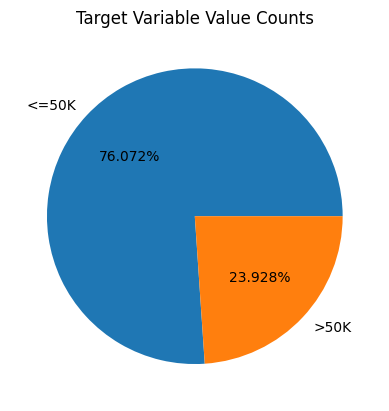

In [16]:
labels = df.income.unique()

sizes = df.income.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()



#### Unbalanced Binary dataset

We can either:
- Downsample & upweight the majority class
- Bias the model to pay more attention to the samples in the minority class

In [17]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [19]:
df.drop("fnlwgt", axis=1, errors="ignore", inplace=True)

In [20]:
# Encode categorical features
df["income"] = LabelEncoder().fit_transform(df["income"])
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,11,9,4,1,3,4,1,0,0,20,39,0


In [21]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
target = 'income'

X = df.drop(columns=target, axis= 1)
y = LabelEncoder().fit_transform(df[target]) 

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

Hyperparameter tuning

In [ ]:
# Define model + params
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 250],
    'learning_rate': [0.1, 0.01],
    'max_depth': [4, 5, 6],
    'subsample': [0.8, 1.0]
}



()

In [26]:
# GridSearchCV
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=cv_strategy,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.1, 0.01], 'max_depth': [4, 5, ...], 'n_estimators': [200, 250], 'subsample': [0.8, 1.0]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [27]:
y_pred = grid.predict(X_test)

In [32]:
# Evaluate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

best_model = grid.best_estimator_
roc_auc_sc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"ROC_AUC_score: {roc_auc_sc * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Best Params:", grid.best_params_)

ROC_AUC_score: 80.92%
Accuracy: 87.97%
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250, 'subsample': 1.0}


In [29]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7045  434]
 [ 741 1549]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.68      0.73      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.88      0.88      0.88      9769



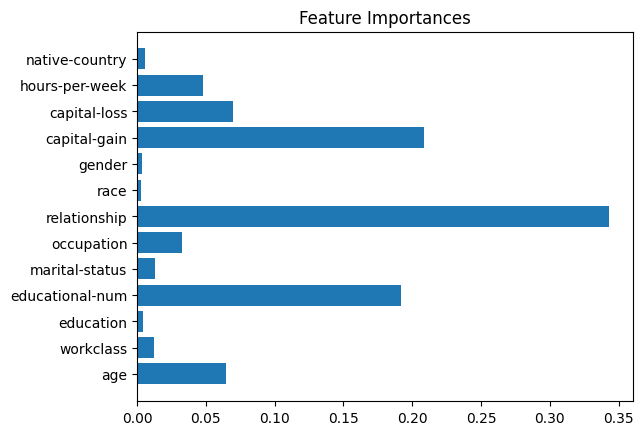

In [31]:
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importances")
plt.show()